In [37]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sn 
from sklearn.preprocessing import MinMaxScaler

In [38]:
df=pd.read_csv("income.csv")
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,28,61000
3,ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


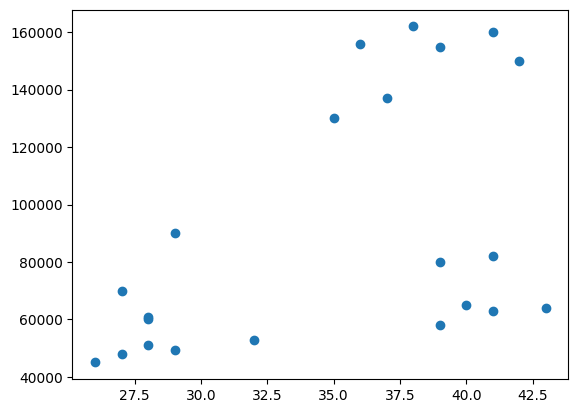

In [39]:
plt.scatter(df['Age'], df['Income'])

In [40]:
km= KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [41]:
y_predict= km.fit_predict(df[['Age', 'Income']])
y_predict

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [42]:
df['cluster']= y_predict
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,28,61000,2
3,ismail,28,60000,2
4,Kory,42,150000,1


C:\Users\HPENG\AppData\Local\Temp\ipykernel_23088\654481936.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


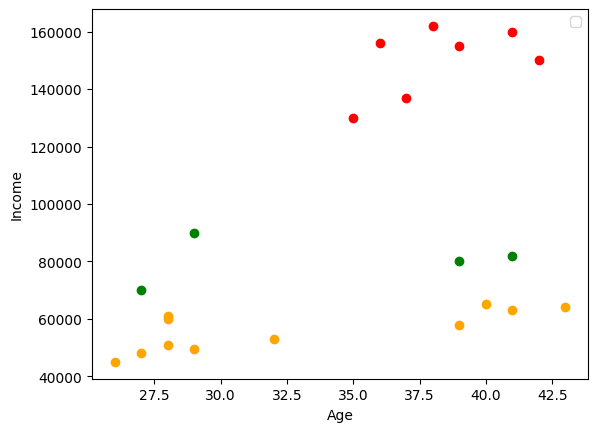

In [43]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age, df1.Income, color='green')
plt.scatter(df2.Age, df2.Income, color='red')
plt.scatter(df3.Age, df3.Income, color='orange')

# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker="*", label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [51]:
scaler=MinMaxScaler()
scaler.fit(df[['Income']])
df['Income']= scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.117647,0.136752,2
3,ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [52]:
km= KMeans(n_clusters=3)
y_predict= km.fit_predict(df[['Age','Income']])
y_predict

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [54]:
df['cluster']=y_predict
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.117647,0.136752,1
3,ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


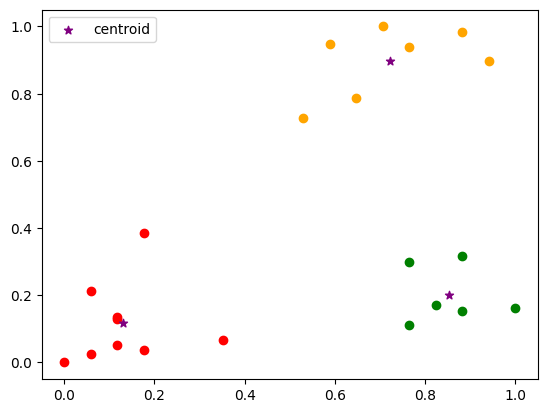

In [59]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age, df1.Income, color='green')
plt.scatter(df2.Age, df2.Income, color='red')
plt.scatter(df3.Age, df3.Income, color='orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker="*", label='centroid')
plt.legend()

In [61]:
k_range= range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

In [62]:
sse

[5.477578671472291,
 2.0895985186490957,
 0.4735404798053287,
 0.360970120029752,
 0.2836008729378144,
 0.24552691952064976,
 0.18556811078326468,
 0.16270772557260005,
 0.1023797310968665]

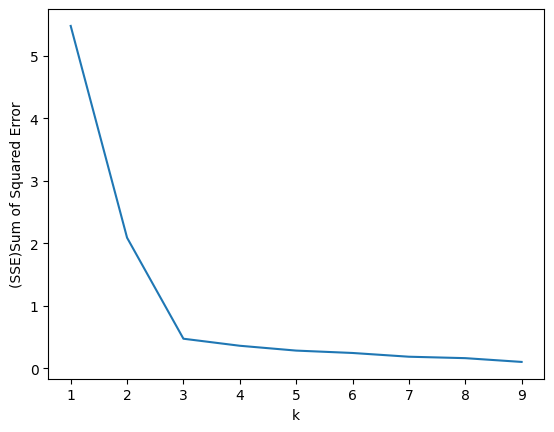

In [64]:
plt.xlabel('k')
plt.ylabel('(SSE)Sum of Squared Error')
plt.plot(k_range, sse)